In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import os

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from pre_fun import *

import matplotlib.ticker as ticker
matplotlib.rcParams['text.usetex'] = False
# matplotlib.rcParams['text.latex.unicode'] = True

In [5]:
# names of setup objects

name_list = []

for i in range(0,16):
    
    name_list.append( '20180602_test_' + str(i) + '_model_1.sim'  )


In [6]:
# load setup objects
setup_list = []

for i in range(0,16):
    
    setup_list.append( Setup.load_setup( name_list[i] ) )

In [8]:
# Define plotting functions

def interactivePlotting( I, sol_arg, centers, L, plotindex = None, markers = None,
                        styles = None, labels = None, savename = None ):
    """
    Plotting time dependent solutions
    """
    label_flag = 0
    marker_flag = 0
    style_flag = 0
    
    # check input
    if isinstance( sol_arg, np.ndarray):
        # normal or interactive plot mode
        
        if plotindex is None and not sol_arg.shape.__len__() == 1:
            
            raise ValueError('Dimension mismatch, have to give plotindex')
        
        elif sol_arg.shape.__len__() == 1:
            
            sol_plot = [ sol_arg ]
            
            # extraxt ion/pot max and min on yaxis and xaxis
            cmin = sol_arg[0:2*I].min() - sol_arg[0:2*I].min() * 0.05
            cmax = sol_arg[0:2*I].max() + sol_arg[0:2*I].max() * 0.05

            phimin = sol_arg[2*I:3*I].min() - sol_arg[2*I:3*I].min() * 0.05
            phimax = sol_arg[2*I:3*I].max() + sol_arg[2*I:3*I].max() * 0.05
        
        elif isinstance(plotindex, int) and sol_arg.shape.__len__() == 2:
            
            sol_plot = [ sol_arg[:,plotindex] ]
            
            # extraxt ion/pot max and min on yaxis and xaxis
            cmin = sol_arg[0:2*I,:].min() - sol_arg[0:2*I,:].min() * 0.05
            cmax = sol_arg[0:2*I,:].max() + sol_arg[0:2*I,:].max() * 0.05

            phimin = sol_arg[2*I:3*I,:].min() - sol_arg[2*I:3*I,:].min() * 0.05
            phimax = sol_arg[2*I:3*I,:].max() + sol_arg[2*I:3*I,:].max() * 0.05
            
    elif isinstance( sol_arg, list):
        # plot single sol pictures
        
        sol_plot = sol_arg
        
        cmin_tmp = min([ el[0:2*I].min() for el in sol_plot ])
        cmax_tmp = max([ el[0:2*I].max() for el in sol_plot ])
        
        pmin_tmp = min([ el[2*I:3*I].min() for el in sol_plot ])
        pmax_tmp = max([ el[2*I:3*I].max() for el in sol_plot ])
        
        # extraxt ion/pot max and min on yaxis and xaxis
        cmin = cmin_tmp - cmin_tmp * 0.05
        cmax = cmax_tmp +  cmax_tmp * 0.05

        phimin = pmin_tmp - pmin_tmp * 0.05
        phimax = pmax_tmp + pmax_tmp * 0.05
        
    if not markers is None:
    
        if not isinstance(markers, list) or not markers.__len__() == sol_plot.__len__():
            
            raise ValueError('Markers have to be a list with same length as sol_arg!')
            
        else:
            
            marker_flag = 1
    
    if not styles is None:
        
        if not isinstance(styles, list) or not styles.__len__() == sol_plot.__len__():
            
            raise ValueError('Styles have to be a list with same length as sol_arg!')
            
        else:
            
            style_flag = 1
            
    if not labels is None:
        
        if not isinstance(labels, list) and not labels.__len__() == sol_plot.__len__():
            
            raise TypeError('Labels have to be a list with same length as sol_arg!')
        
        else:
            
            label_flag = 1
            
    xmin = - L/30.
    xmax = L + L/30.
    
    fig = plt.figure( dpi = 120 )
    
    # create axes
    ax = fig.add_subplot(2,1,1)
    ax1 = fig.add_subplot(2,1,2, sharex = ax)
    
    # iterate over sol_plot list
    for i in range(0, sol_plot.__len__() ):
        
        # cations
        c_line = ax.plot(centers * L, sol_plot[i][0:I], color = "blue", alpha = 0.7, lw = 1.4,)[0];
        
        # anions
        a_line = ax.plot(centers * L, sol_plot[i][I:2*I], color = "red",alpha = 0.7, lw = 1.4,)[0];
        
        # potential
        p_line = ax1.plot(centers * L, sol_plot[i][2*I:3*I],alpha = 0.7, color = "black", lw = 1.4,)[0];
        
        print(p_line)
        
        if marker_flag == 1:
            
            c_line.set_marker(markers[i])
            c_line.set_markersize(4)
            c_line.set_markevery(10)
            
            a_line.set_marker(markers[i])
            a_line.set_markersize(4)
            a_line.set_markevery(10)
            
            p_line.set_marker(markers[i])
            p_line.set_markersize(4)
            p_line.set_markevery(10)
            
        if style_flag == 1:
            
            c_line.set_linestyle(styles[i])
            a_line.set_linestyle(styles[i])
            p_line.set_linestyle(styles[i])
            
        if label_flag == 1:
            
           # c_line.set_label(labels[i])
            #a_line.set_label(labels[i])
            p_line.set_label(labels[i])
            
    # axis spec 
    
    # labels
    ax.set_ylabel(r"Concentration [M]")
    ax1.set_xlabel(r"x [nm]")
    ax1.set_ylabel(r"Potential [mV]")

    # grids
    ax.grid(b=True, which = 'major', axis = 'both')
    ax1.grid(b=True, which = 'major', axis = 'both')
    
    # axis ticks
    plt.setp(ax.get_xticklabels(), visible = False)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))
    
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 8)
    
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    
    # fill anode catode
    ax.fill_between( [xmin,0],cmin, cmax, facecolor = "red", alpha = 0.4)
    ax1.fill_between( [xmin,0],phimin, phimax, facecolor = "red", alpha = 0.4)
    
    ax.fill_between( [L,xmax+1],cmin, cmax, facecolor = "blue", alpha = 0.4)
    ax1.fill_between( [L,xmax+1],phimin, phimax, facecolor = "blue", alpha = 0.4)
    
    # annotate anode catode
    ax.text(0.005, 0.56, 'Anode', rotation=90,transform=ax.transAxes, fontsize = 8)
    ax1.text(0.005, 0.56, 'Anode', rotation=90,transform=ax1.transAxes, fontsize = 8)
    
    ax.text(0.975, 0.56, 'Catode', rotation=90,transform=ax.transAxes, fontsize = 8)
    ax1.text(0.975, 0.56, 'Catode', rotation=90,transform=ax1.transAxes, fontsize = 8)
    
    # set ax limits
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([cmin, cmax])
    ax1.set_ylim([phimin, phimax])
    
    # legend
    handles, labels = ax.get_legend_handles_labels()
    handles1, labels1 = ax1.get_legend_handles_labels()
    
    if label_flag == 1:
        
        ax1.legend(handles + handles1, labels + labels1, loc = 9, bbox_to_anchor = (0.55,-0.15), fancybox = True, ncol = 2 )
    
    fig.tight_layout()
    
    if isinstance(savename, str):
        
        for fmt in ['png', 'pdf']:
            fig.savefig(savename + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )
    
    plt.show()
    


# plot solution

# interact( interactivePlotting,plotindex =widgets.IntSlider(min = 0, max = stp4.N-1, value = 0),
#          I = fixed(stp4.I), sol = fixed(stp4.sol_data), centers = fixed(centers), L = fixed(L) );


Line2D(_line0)
Line2D(_line1)
Line2D(_line2)
Line2D(_line3)
Line2D(_line4)
Line2D(_line5)
Line2D(_line6)
Line2D(_line7)


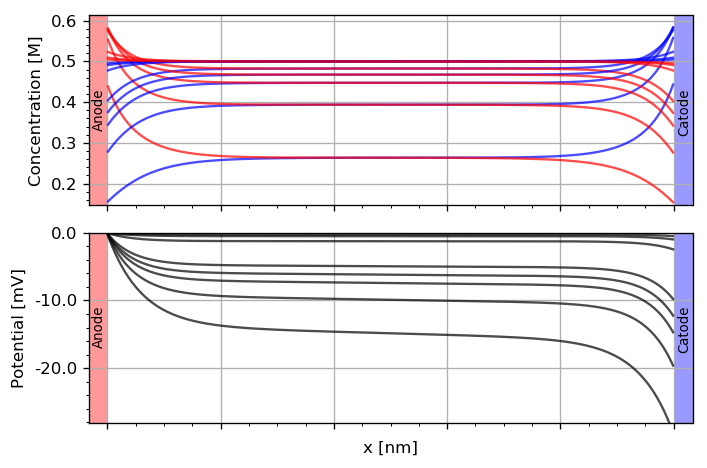

In [47]:
_, centers = calcAxis( setup_list[0].I )

L = setup_list[0].L
cur_ss = np.zeros([ setup_list.__len__(),2], dtype = np.float64)
volt_ss = np.zeros([ setup_list.__len__()], dtype = np.float64)

# markers = ['.','^','s', 'o','1','h','+','x','*','D'  ]
# styles = [':', '--', '-','--','-', '--', '-',':','-','--' ]
# labels = [5e-3, 10e-3, 15e-3, 20e-3, 30e-3 ]
# labels = ['$\phi_C = -30e-3$ mV',
#           '$\phi_C = -20e-3$ mV',
#           '$\phi_C = -15e-3$ mV',
#           '$\phi_C = -10e-3$ mV' ,
#           '$\phi_C = -5e-3$ mV',
#           '$\phi_C = 5e-3$ mV',
#           '$\phi_C = 10e-3$ mV',
#           '$\phi_C = 15e-3$ mV',
#           '$\phi_C = 20e-3$ mV',
#           '$\phi_C = 30e-3$ mV' ]

sol_list = []
cur_list = []
label_list = []

k = 0
for el in setup_list:
    
    sol_list.append(el.sol_data)
    cur_list.append(el.current_data)
    label_list.append(r'$\phi_C = {:1.1f} $ mV'.format(np.mean(el.input_voltage_data) * el.phi0 * 1e3))
    cur_ss[k,:] = el.current_ss
    volt_ss[k] = np.mean(el.input_voltage_data) * el.phi0 * 1e3
    k = k+1
    
    
interactivePlotting( setup_list[0].I, sol_list[0:8], centers, L, plotindex = 0, 
#                     markers = markers[5:],
#                     styles = styles[5:],
#                      labels = labels[5:],
#                     savename = "20180602_model_1_sweep_low_2"
                   );

'$\\phi_C = -30.00 $ mV'

In [37]:
# plot current function
# plot current
def plotCurrent( Dt, T0, cur_arg, electrode = 'anode', markers = None, styles = None, labels = None,
               savename = None):
    
    # cur arg is list or cur arg is single numpy array
    label_flag = 0
    marker_flag = 0
    style_flag = 0
    
    # check input
    if isinstance( cur_arg, np.ndarray):

        # normal or interactive plot mode
        if electrode == 'anode':
            
            cur_plot = [ cur_arg[0,3:] ]
            
            plotcolor = 'red'
            
        elif electrode == 'catode':
            
            cur_plot = [ cur_arg[1,3:] ]
            
        elif electrode == 'both':
            
            cur_plot = [ cur_arg[:,3:] ]
            
            plotcolor = 'blue'
            
    elif isinstance( cur_arg, list):
        
        if electrode == 'anode':
            
            cur_plot = []
            
            for array in cur_arg:
                
                cur_plot.append( array[0,3:] )
            
        elif electrode == 'catode':
            
            cur_plot = []
            
            for array in cur_arg:
                
                cur_plot.append( array[1,3:] )
            
        elif electrode == 'both':
            
            cur_plot = []
            
            for array in cur_arg:
                
                cur_plot.append( array[:,3:] )
        
    if not markers is None:
    
        if not isinstance(markers, list) or not markers.__len__() == cur_plot.__len__():
            
            raise ValueError('Markers have to be a list with same length as sol_arg!')
            
        else:
            
            marker_flag = 1
    
    if not styles is None:
        
        if not isinstance(styles, list) or not styles.__len__() == cur_plot.__len__():
            
            raise ValueError('Styles have to be a list with same length as sol_arg!')
            
        else:
            
            style_flag = 1
            
    if not labels is None:
        
        if not isinstance(labels, list) and not labels.__len__() == cur_plot.__len__():
            
            raise TypeError('Labels have to be a list with same length as sol_arg!')
        
        else:
            
            label_flag = 1
            

    
    fig = plt.figure( dpi = 120 )
    
    # create axes
    ax = fig.add_subplot(1,1,1)
    
    # iterate over sol_plot list
    for i in range(0, cur_plot.__len__() ):
        
        array = cur_plot[i]
        
        print(array.shape)
        
        if electrode == 'both':
            
            N = array.shape[1]
            
            
            # create t axis
            t = np.zeros(N, dtype = np.float64)
            for j in range(0,N):
                t[j] = j*Dt        
            a_line = ax.plot(t*T0, array[0,:], color = 'red',alpha = 0.7,  lw = 1.4, )[0]
            
            c_line = ax.plot(t*T0, array[1,:], color = 'blue',alpha = 0.7,  lw = 1.4, )[0]
            
            
        else:
            
            N = array.shape[0]
            print(N)
            # create t axis
            
            t = np.zeros(N, dtype = np.float64)
            for j in range(0,N):
                t[j] = j*Dt
                
            a_line = ax.plot(t*T0, array, alpha = 0.7, color = "black", lw = 1.4, )[0]
            
        if marker_flag == 1:
            
            a_line.set_marker(markers[i])
            a_line.set_markersize(4)
            a_line.set_markevery(1200)
            
            try:
                c_line.set_marker(markers[i])
                c_line.set_markersize(3)
                c_line.set_markevery(800)
            
            except:
                
                pass
            
        if style_flag == 1:
            
            a_line.set_linestyle(styles[i])
            
            try:
                c_line.set_linestyle(styles[i])
            except:
                pass
            
        if label_flag == 1:
            
            a_line.set_label(labels[i])
    
    # logscale
    ax.set_yscale('symlog', linthresh = 1e-14)
    
    # labels
    ax.set_ylabel(r"Current [$mA cm^{-2}$]")
    ax.set_xlabel(r"t [s]")
    
    # grids
    ax.grid(b=True, which = 'major', axis = 'both')
        
    # axis ticks
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
        
    #ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
       
#     ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
#     ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    
    if label_flag == 1:
        
        handles, labels = ax.get_legend_handles_labels()
        
        ax.legend(handles, labels, ncol = 2 )#loc = 9,)
                   # bbox_to_anchor = (0.55,-0.15), fancybox = True,  )
    
    if isinstance(savename, str):

        for fmt in ['png', 'pdf']:
            fig.savefig(savename + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )
    
    
    plt.show()

(2, 1414)
(2, 1564)
(2, 9272)
(2, 65533)
(2, 65533)
(2, 65533)
(2, 65533)
(2, 65533)


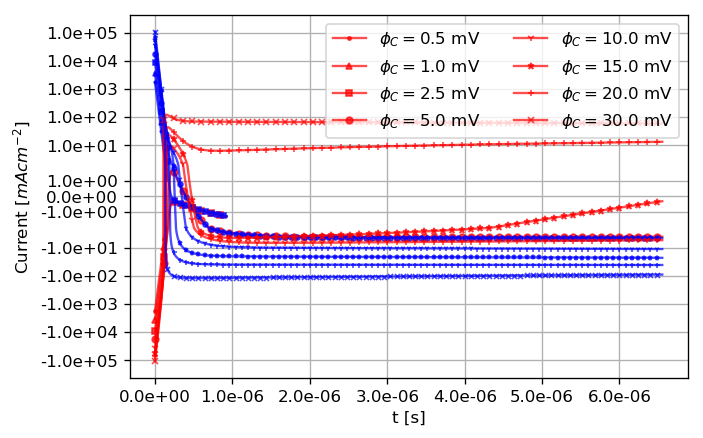

In [42]:
markers = ['.','^','s', 'o','1','*','+','x'] #,'*','D'  ]
styles = [':', '--', '-','--','-', '--', '-',':','-','--' ]

plotCurrent( setup_list[0].Dt, setup_list[0].T0, cur_list[8:], electrode = 'both',
            markers = markers[:],
#             styles = styles[:],
            labels = label_list[8:],
#             savename = "20180602_model_1_test1_anode_highlow_1"
           )

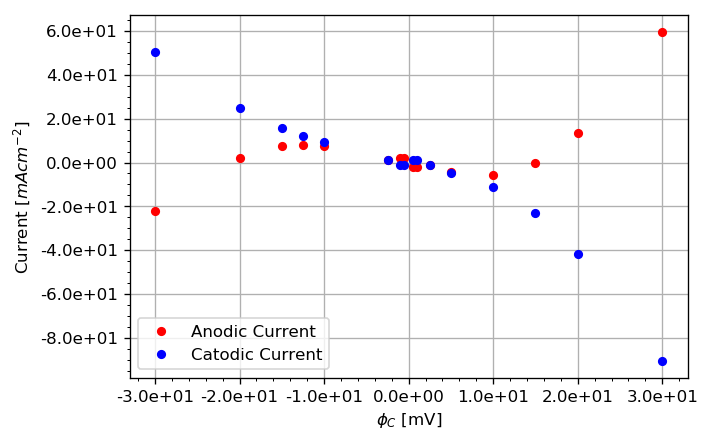

In [49]:
# plot steady state currents       
fig = plt.figure( dpi = 120 )
    
# create axes
ax = fig.add_subplot(1,1,1)

ax.plot(volt_ss, cur_ss[:,0], ls = 'None', marker = '.', markersize = 9,
        color = 'red', label = 'Anodic Current')
ax.plot(volt_ss, cur_ss[:,1], ls = 'None', marker = '.', markersize = 9,
        color = 'blue', label = 'Catodic Current')

# labels
ax.set_ylabel(r"Current [$mA cm^{-2}$]")
ax.set_xlabel(r"$\phi_C$ [mV]")

# grids
ax.grid(b=True, which = 'major', axis = 'both')

# axis ticks
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))

#ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, )

# for fmt in ['png', 'pdf']:
#     fig.savefig('20180602_model1_test2_UI' + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )